In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Build model using LinearRegression

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:
cars.columns

Index(['length', 'width', 'curb-weight', 'engine-size', 'horsepower',
       'city-mpg', 'price', 'fuel-type_diesel', 'fuel-type_gas',
       'num-of-doors_four', 'num-of-doors_two', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_4wd', 'drive-wheels_fwd',
       'drive-wheels_rwd'],
      dtype='object')

In [4]:
cars.head()

,length,width,curb-weight,engine-size,horsepower,city-mpg,price,fuel-type_diesel,fuel-type_gas,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,168.8,64.1,2548,130,111,21,13495.0,0,1,0,1,1,0,0,0,0,0,0,1
1,168.8,64.1,2548,130,111,21,16500.0,0,1,0,1,1,0,0,0,0,0,0,1
2,171.2,65.5,2823,152,154,19,16500.0,0,1,0,1,0,0,1,0,0,0,0,1
3,176.6,66.2,2337,109,102,24,13950.0,0,1,1,0,0,0,0,1,0,0,1,0
4,176.6,66.4,2824,136,115,18,17450.0,0,1,1,0,0,0,0,1,0,1,0,0


In [3]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [6]:
X.shape,y.shape

((199, 18), (199,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Display coefficient for each column
for t in zip(X_train.columns, model.coef_):
  print(f"{t[0]:25s} {t[1]:.0f}")

length                    -40
width                     882
curb-weight               -0
engine-size               80
horsepower                73
city-mpg                  7
fuel-type_diesel          604
fuel-type_gas             -604
num-of-doors_four         -29
num-of-doors_two          29
body-style_convertible    3922
body-style_hardtop        -289
body-style_hatchback      -1962
body-style_sedan          -302
body-style_wagon          -1369
drive-wheels_4wd          749
drive-wheels_fwd          -946
drive-wheels_rwd          197


In [13]:
model.intercept_

-53760.70825380572

### Calculate accuracy with train data

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [23]:
y_pred = model.predict(X_train)
print("MSE  : ", mean_squared_error(y_train,y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_train,y_pred)))

MSE  :  9620723.918222362
RMSE :  3101.7291819600177


In [24]:
r2score = r2_score(y_train,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.84


### Test with test data

In [25]:
y_pred = model.predict(X_test)

In [26]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 11230784.48
Root Mean Squared Error : 3351.24
Mean Absolute Error : 2534.29
R2 Score: 0.83


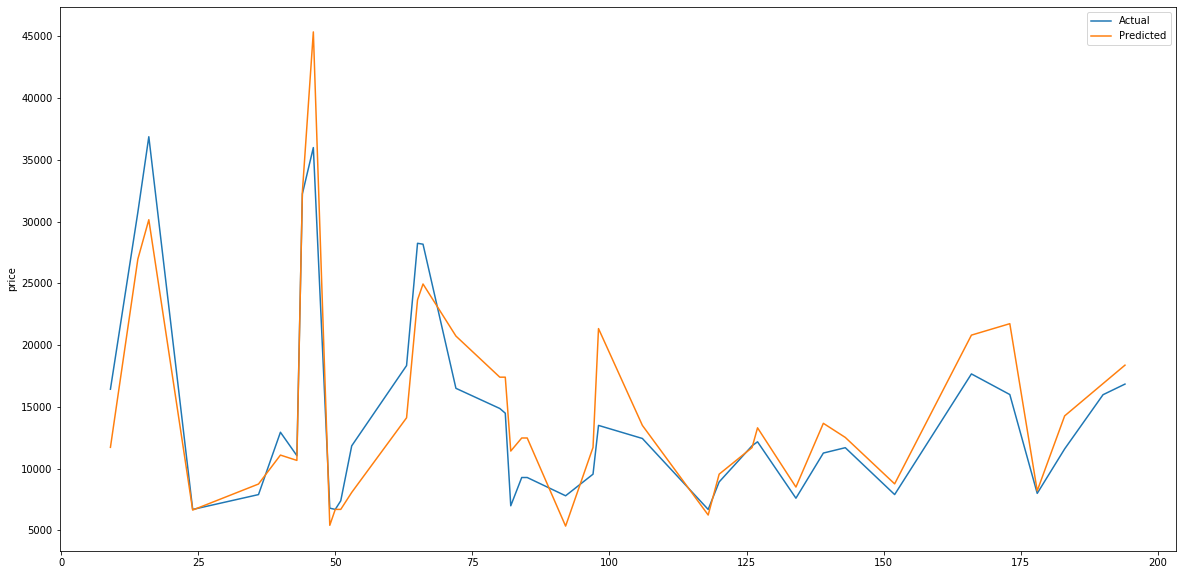

In [27]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [40]:
for p,a in zip(y_pred[:10],y_test[:10]):
    print(f"{p:6.0f}  -  {a:6.0f} - {p - a:6.0f}")

  5344  -    7799 -  -2455
  6241  -    6692 -   -451
 21737  -   15998 -   5739
 23667  -   28248 -  -4581
 16887  -   15985 -    902
  5407  -    6795 -  -1388
 17406  -   14869 -   2537
 24952  -   28176 -  -3224
  8505  -    7603 -    902
 13668  -   11259 -   2409


## Model with Standardization 

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [43]:
## Scale X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X_train = pd.DataFrame(X_train,columns = X.columns)

In [45]:
X_train.head()

,length,width,curb-weight,engine-size,horsepower,city-mpg,fuel-type_diesel,fuel-type_gas,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,-1.182989,-1.039232,-1.006283,-0.836344,-1.100279,0.824697,-0.322749,0.322749,0.875595,-0.875595,-0.160644,-0.214599,1.356203,-0.909718,-0.379322,-0.180187,0.820783,-0.768115
1,-0.388198,-0.850819,-0.633132,-0.683582,-0.877171,0.521163,-0.322749,0.322749,-1.142080,1.142080,-0.160644,-0.214599,1.356203,-0.909718,-0.379322,-0.180187,-1.218349,1.301889
2,2.012071,1.221719,1.501136,-0.123458,-0.179960,-0.996509,-0.322749,0.322749,0.875595,-0.875595,-0.160644,-0.214599,-0.737353,-0.909718,2.636285,-0.180187,-1.218349,1.301889
3,0.239687,0.279656,0.590963,0.283905,0.377810,-1.148276,-0.322749,0.322749,0.875595,-0.875595,-0.160644,-0.214599,-0.737353,1.099242,-0.379322,5.549775,-1.218349,-0.768115
4,-0.229240,0.986204,1.212882,1.429614,2.748330,-1.300043,-0.322749,0.322749,-1.142080,1.142080,-0.160644,-0.214599,1.356203,-0.909718,-0.379322,-0.180187,-1.218349,1.301889


In [46]:
X_test = pd.DataFrame(X_test,columns = X.columns)

In [47]:
X_test.head()

,length,width,curb-weight,engine-size,horsepower,city-mpg,fuel-type_diesel,fuel-type_gas,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,-0.634583,-0.945025,-0.980617,-0.709043,-0.905060,0.824697,-0.322749,0.322749,-1.142080,1.142080,-0.160644,-0.214599,1.356203,-0.909718,-0.379322,-0.180187,0.820783,-0.768115
1,-0.499469,-0.945025,-1.057616,-0.887264,-0.932948,0.824697,-0.322749,0.322749,0.875595,-0.875595,-0.160644,-0.214599,-0.737353,1.099242,-0.379322,-0.180187,0.820783,-0.768115
2,0.788093,0.891997,0.970037,1.175012,1.660680,-0.996509,-0.322749,0.322749,-1.142080,1.142080,-0.160644,-0.214599,1.356203,-0.909718,-0.379322,-0.180187,-1.218349,1.301889
3,1.376238,2.116679,2.419207,1.480535,0.600918,-0.541207,3.098387,-3.098387,0.875595,-0.875595,-0.160644,-0.214599,-0.737353,-0.909718,2.636285,-0.180187,-1.218349,1.301889
4,1.209332,0.656482,0.810115,0.411206,0.349921,-0.237673,-0.322749,0.322749,0.875595,-0.875595,-0.160644,-0.214599,-0.737353,1.099242,-0.379322,-0.180187,-1.218349,1.301889


In [48]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_pred = model.predict(X_test)

In [50]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 11230784.48
Root Mean Squared Error : 3351.24
Mean Absolute Error : 2534.29
R2 Score: 0.83


### Micro model with 2 features 

In [35]:
# Micro model
X_micro =  X[['engine-size','city-mpg']]
y_micro =  y

In [36]:
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro,y_micro, test_size=0.2, random_state=0)

In [37]:
micro_model = LinearRegression(normalize=True)
micro_model.fit(X_micro_train,y_micro_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [38]:
micro_model.score(X_micro_train,y_micro_train) # r2 for train data 

0.7710813762078876

In [39]:
y_micro_pred = micro_model.predict(X_micro_test)

In [41]:
r2score = r2_score(y_micro_test,y_micro_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.85


## Regularization 

In [8]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

In [9]:
lm = LassoCV(cv=5, normalize=True)
lm.fit(X,y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [10]:
# Display coefficient for each column
for t in zip(X_train.columns, lm.coef_):
  print(f"{t[0]:25s} {t[1]}")

length                    0.0
width                     730.9536652927258
curb-weight               0.0
engine-size               82.45340644784325
horsepower                46.155259639245614
city-mpg                  -0.0
fuel-type_diesel          76.95555327454355
fuel-type_gas             -0.0
num-of-doors_four         0.0
num-of-doors_two          -0.0
body-style_convertible    1989.870743637022
body-style_hardtop        0.0
body-style_hatchback      -696.5068229412847
body-style_sedan          0.0
body-style_wagon          -0.0
drive-wheels_4wd          0.0
drive-wheels_fwd          -621.6813465119818
drive-wheels_rwd          1179.8611201495312


In [11]:
# Take a part of data for final testing 
y_test  = y[:100]
X_test = X[:100]
y_pred = lm.predict(X_test)

In [14]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  10587606.541140363
RMSE :  3253.860252245072


In [12]:
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.88


## RandomForestRegressor 

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [25]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9869475209985776


In [26]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.91


In [27]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  6257180.3761794465
RMSE :  2501.4356630102334


In [28]:
for f,v in zip (X_train.columns, model.feature_importances_):
      print(f"{f:30} {v:0.2f}")

length                         0.02
width                          0.02
curb-weight                    0.27
engine-size                    0.55
horsepower                     0.04
city-mpg                       0.08
fuel-type_diesel               0.00
fuel-type_gas                  0.00
num-of-doors_four              0.00
num-of-doors_two               0.00
body-style_convertible         0.00
body-style_hardtop             0.00
body-style_hatchback           0.00
body-style_sedan               0.00
body-style_wagon               0.00
drive-wheels_4wd               0.00
drive-wheels_fwd               0.00
drive-wheels_rwd               0.00


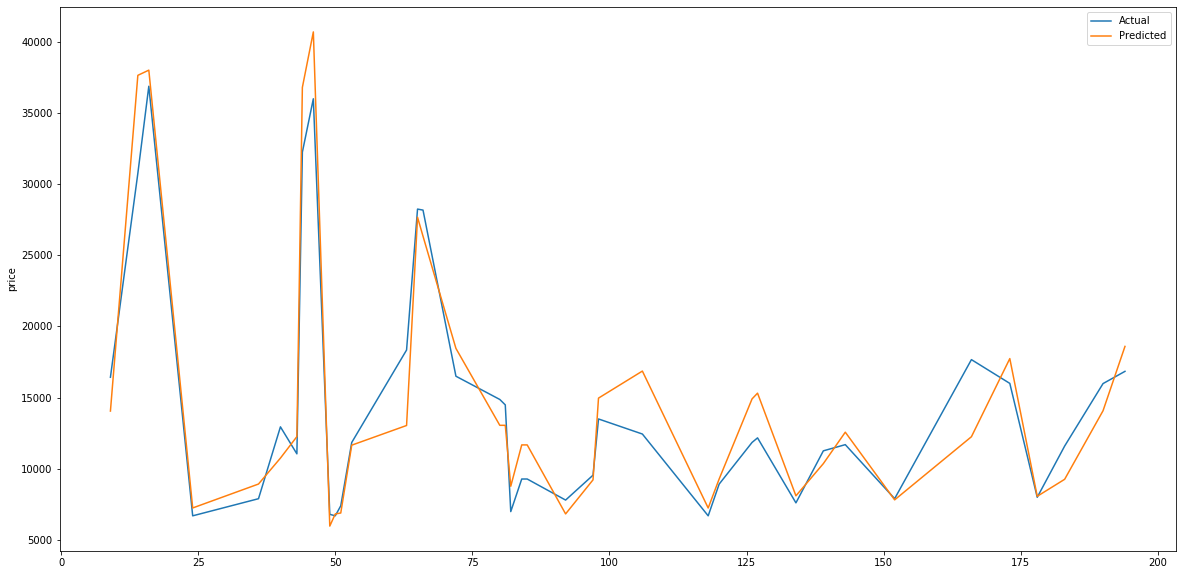

In [29]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### SGDRegressor

In [16]:
from sklearn.linear_model import SGDRegressor

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
## use same scale for X_train and X_test
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = SGDRegressor(random_state=100, penalty="l1", )
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.8436500315479742


In [21]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.83


In [22]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  11496390.10836428
RMSE :  3390.632700303039
